In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob
import os
import re

In [ ]:
datadir = "/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/predictions/testing_set_yolo_threshold_04/labels/"

In [ ]:
def add_one_wedge():
  x_center = int(xcen * dims)
  y_center = int(ycen * dims)
  x_min = int(x_center - xlen/2 * dims)
  x_max =  int(x_center + xlen/2 * dims)
  y_min = int(y_center - ylen/2 * dims)
  y_max = int(y_center + ylen/2 * dims)
  #making sure the area of interest does not exceed image boundaries
  if y_min < 0:
    y_min = 0
  if x_min < 0:
    x_min = 0
  if y_max > dims:
    y_max = dims
  if x_max > dims:
    x_max = dims
  #
  x_length = x_max - x_min
  y_width = y_max - y_min
  #
  stretched_wedge = cv2.resize(wedge,(x_length, y_width))
  #
  small_img = stretched_wedge
  roi = img[y_min:y_max, x_min:x_max]
  small_img_gray = cv2.cvtColor(stretched_wedge, cv2.COLOR_RGB2GRAY)
  ret, mask = cv2.threshold(small_img_gray, x_length, y_width, cv2.THRESH_BINARY)
  bg = cv2.bitwise_or(roi,roi,mask = mask)
  mask_inv = cv2.bitwise_not(small_img_gray)
  try:
    fg = cv2.bitwise_and(small_img,small_img, mask=mask_inv)
    final_roi = cv2.add(bg, fg)
    small_img = final_roi
    img[y_min : y_min + small_img.shape[0], x_min : x_min + small_img.shape[1]]= small_img
  except:
    e = sys.exc_info()[0]
    print(e)
    pass
  #print(x_center, y_center, x_min, x_max, y_min, y_max)

def save_image(outpath): 
  base=os.path.basename(textfile)
  justname = os.path.splitext(base)[0]
  #filename = outpath + justname + "_output.png"
  filename = outpath + justname + ".png"
  #print(filename)
  cv2.imwrite(filename, img)

def add_all_wedges():
  global img
  img = np.ones((dims,dims,3), np.uint8)
  #counts predicted bounding boxes
  with open(textfile) as f:
      contents = f.readlines()
  count = 0
  for line in contents:
      count += 1
  #print(contents)
  #print(count)
  ff = []
  for item in contents:
    ff.append(re.split(r" ", item.strip()))
  for i in range(0,count):
    for j in range(1,5):
      if j == 1:
        global xcen
        xcen = float(ff[i][j])
      if j == 2:
        global ycen
        ycen = float(ff[i][j])
      if j == 3:
        global xlen
        xlen = float(ff[i][j])
      if j == 4:
        global ylen
        ylen = float(ff[i][j])
        #print(xcen, ycen, xlen, ylen)
        add_one_wedge()
  save_image(outputpath)

In [ ]:
os.chdir(datadir)
myFiles = glob.glob('*.txt')
print(myFiles)

['proc_YBC04621_KWtif-R005-C012_png.rf.6339b98d968d7152fd792dc95d8ca762.txt', 'proc_YBC07169tif-R003-C006_png.rf.3729bfeda45f2502f8690ef0fe2b7d09.txt', 'proc_05-05_NBC11595_KWtif-R003-C002_png.rf.88eaa9d3a826ade484b75feb9b4d7202.txt', 'proc_05-05_NBC11595_KWtif-R009-C001_png.rf.26ce555e00c3de86ed584740f40cbf9a.txt', 'proc_05-05_NBC11595_KWtif-R009-C002_png.rf.7e61161c87ecc2961ef18ac0b94b7395.txt', 'proc_05-05_NBC11595_KWtif-R011-C002_png.rf.42ecc0045d83ffbb46556dc7d06661b3.txt', 'proc_15-03_YBC09857_KWtif-R001-C010_png.rf.73a916340839e9c07bdff6bc5bcbeb5b.txt', 'proc_15-03_YBC09857_KWtif-R002-C007_png.rf.b4cf84abde665fdca6e811f22e5131fe.txt', 'proc_15-03_YBC09857_KWtif-R003-C003_png.rf.0fcdaa50a9d686ae0957ec05af275df9.txt', 'proc_15-03_YBC09857_KWtif-R003-C008_png.rf.f0eaf510db7c3ff66e3c4d9e0b27ea2a.txt', 'proc_15-03_YBC09857_KWtif-R004-C002_png.rf.c915e477590dd8276b0ac5799d373075.txt', 'proc_15-03_YBC09857_KWtif-R004-C007_png.rf.6110c4a5bf367f4ddbbaf8d7ba6bc0f2.txt', 'proc_15-03_YBC098

In [ ]:
dims = 416
wedge = cv2.imread("/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Utility/Draw_wedge/hline2.png")
!mkdir /content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/predictions/testing_set_yolo_threshold_04/vector_preds/
outputpath = "/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/predictions/testing_set_yolo_threshold_04/vector_preds/"

In [ ]:
#for i in range(0,len(myFiles)):
for i in range(0,len(myFiles)):
  textfile = myFiles[i]
  print(textfile)
  textfile = datadir + textfile
  add_all_wedges()

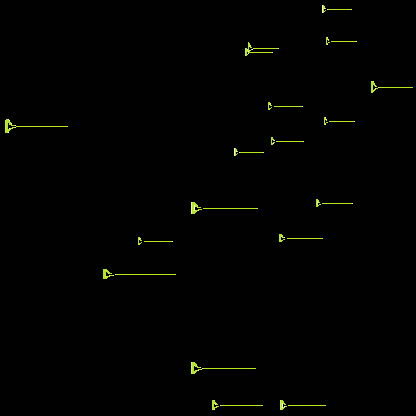

In [ ]:
cv2_imshow(img)